# Проект A/B тестирования

## Описание проекта

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Описание данных

#### Данные для первой части

Hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

#### Данные для второй части

Orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

Visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Импорт данных и библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import math as mth
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
try:
    hypothesis, orders, visitors = (pd.read_csv(r'E:\Yandex_Practikum\AB_test\hypothesis.csv'),
    pd.read_csv(r'E:\Yandex_Practikum\AB_test\orders.csv'),
    pd.read_csv(r'E:\Yandex_Practikum\AB_test\visitors.csv'))
except:
    hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'))

pd.options.display.max_colwidth = 150
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Проверим тип данных, дубликаты и пропуски

In [3]:
print('Типы данных')
print(visitors.info())
print(' ')
print('Дубликаты:', visitors.duplicated().sum())
print('Пропуски:', visitors.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
 
Дубликаты: 0
Пропуски: date        0
group       0
visitors    0
dtype: int64


In [4]:
print('Типы данных')
print(orders.info())
print(' ')
print('Дубликаты:', orders.duplicated().sum())
print('Пропуски:', orders.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
 
Дубликаты: 0
Пропуски: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [5]:
print('Типы данных')
print(hypothesis.info())
print(' ')
print('Дубликаты:', hypothesis.duplicated().sum())
print('Пропуски:', hypothesis.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
 
Дубликаты: 0
Пропуски: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


### Часть 1. Приоритизация гипотез

In [6]:
hypothesis['ice_score'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
display(hypothesis.sort_values(by='ice_score', ascending=False).head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [7]:
hypothesis['rice_score'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by='rice_score', ascending=False).head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div class="alert alert-info">
    
- после применения фреймворка ICE наиболее приоритетными стали гипотезы 8,0 и 7
- после применения фреймворка RICE, показатель Reach(охват) изменил приоритетность. Теперь приоритетными стали гипотезы 7,2 и 0, а гипотеза 8 стала пятой по приоритетности.
    
Гипотеза 8 была самой приоритетной, но имеет очень малый охват. Т.к. за время проведения АВ-теста слишком мало пользователей будут праздновать свои именины.
    
С учетом охвата(Reach) самой приоритетной стала гипотеза 7, т.к. имеет наибольший охват - 10 баллов и высокий Impact - 7, при том же значении Efforts(стоимости проверки гипотезы) - 5
    
Гипотеза 0 в топе-3 в обоих расчетах за счет параметра Impact(степень влияния) - 10, а охват в 30% можно считать относительно полным, т.к. задача привлечь дополнительные 30% пользователей. Новые каналы привлечения имеют высокий Impact за счет таргетирования рекламы 
    
</div>

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


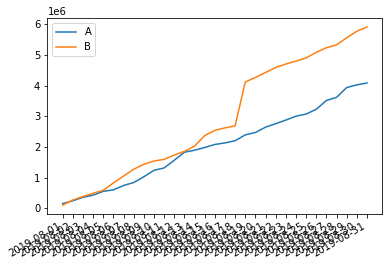

In [8]:
# посмотрим стабильность кумулятивных метрик

datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.gcf().autofmt_xdate()
plt.legend()

<div class="alert alert-info">
    
В середине теста группа В начала превосходить группу А по сумме выручки, вероятно присутствуют заказы с аномальными значениями. Проверим их в ходе дальнейшего анализа.
    
</div>

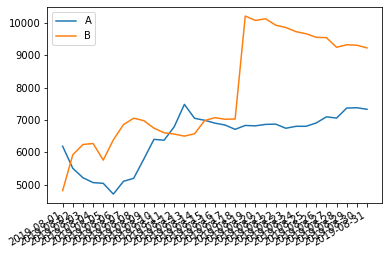

In [9]:
# для каждой группы построим графики кумулятивного среднего чека по дням

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.gcf().autofmt_xdate()
plt.legend()

<div class="alert alert-info">
    
По динамике среднего чека также наблюдаются сильные колебания. В середине теста у группы В средний чек сильно возрастает.
    
</div>

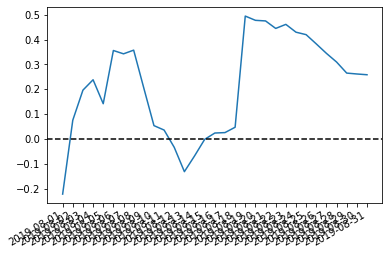

In [10]:
# построим график относительно различия кумулятивного среднего чека группы B к группе A

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.gcf().autofmt_xdate()

<div class="alert alert-info">
    
В некоторые даты наблюдаются значительные изменения различия средних чеков, видимо в эти дни были сделаны аномальные заказы.
    
</div>

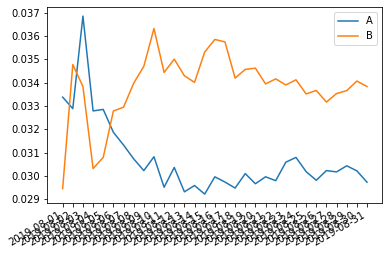

In [11]:
# посмотрим кумулятивные метрики по конверсии в группах

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] # добавим столбец с конверсией

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.gcf().autofmt_xdate()
plt.legend()

<div class="alert alert-info">
    
У группы В после первой недели теста конверсия становится больше чем у группы А и превосходит до конца теста.
    
</div>

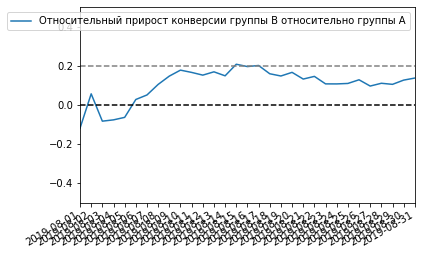

In [12]:
# посмотрим относительную конверсию группы В к группе А

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max(), -0.5, 0.5])
plt.gcf().autofmt_xdate()

<div class="alert alert-info">
    
Относительный прирост конверсии группы В к группе А в середине теста достигает 20%, а к концу теста устанавливается на уровне 10-12%.
    
</div>

### Проанализируем выбросы и всплески (крайние значения данных)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


<AxesSubplot:>

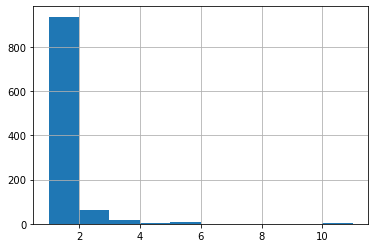

In [13]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})) # количество заказов на одного пользователя
ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

ordersByUsers['orders'].hist()

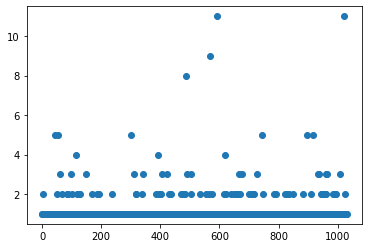

In [14]:
x_orders = pd.Series(range(0, len(ordersByUsers))) # посмотрим точечное распределение
plt.scatter(x_orders, ordersByUsers['orders'])

<div class="alert alert-info">
    
По графикам видно что большинство пользователей делают 1-2 заказа. Посмотрим 95 и 99 перцентили по заказам.
    
</div>

In [15]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


<div class="alert alert-info">
    
Не больше 5% пользователей делали более 2 заказов, и не более 1% - больше 4-х.
    
</div>

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

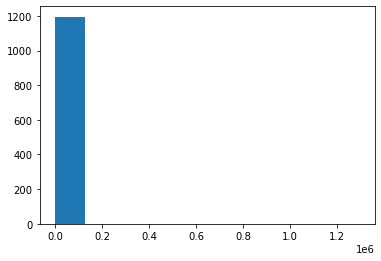

In [16]:
display(orders.sort_values(by='revenue', ascending=False).head(10)) # смотрим распределение по сумме выручки
plt.hist(orders['revenue'])

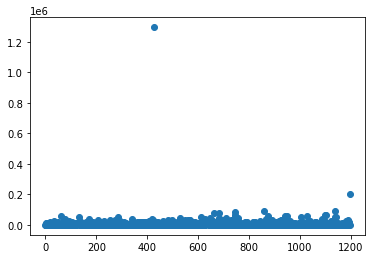

In [17]:
x_revenue = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_revenue, orders['revenue'])

<div class="alert alert-info">
    
По графикам видно что присутствуют аномальные значения по суммам заказа. Посмотрим 95 и 99 перцентили по суммам заказов.
    
</div>

In [18]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


<div class="alert alert-info">
    
Не больше 5% пользователей делали заказы на сумму более 28 тысяч, и не более 1% - больше 58 тысяч.
    
</div>

In [19]:
# разобьем данные по количеству пользователей и заказов по дням

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [20]:
# разделим пользователей на группы А и В, и посчитаем статистическую значимость различий по конверсии и среднему чеку, 
# как по "сырым", так и по очищенным данным

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# в переменных sampleA и sampleB, пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# применим тест Манна-Уитни и вычислим относительное различие в среднем между группами

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


<div class="alert alert-info">
    
Статистической значимость различия в среднем количестве заказов присутствует, значение p-value меньше 0,05. А относительный прирост среднего группы В относительно группы А равен 13,8%  
    
</div>

In [21]:
# посчитаем статистическую значимость по средним чекам

print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


<div class="alert alert-info">
    
По "сырым данным" статистической значимости различия в среднем чеке отсутствует, значение p-value много больше 0,05. А относительный различие среднего чека группы В относительно группы А равен 25,9%. 
    
Значит основные аномалии в количестве заказов на одного пользователя.
    
</div>

In [22]:
# подготовим очищенные от аномалий данные, создадим список с пользователяти, сделавшими аномальные заказы

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# очистим данные от аномалий и посчитаем статистическую значимость количества заказов по "очищенным" данным

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


<div class="alert alert-info">
    
Статистическая значимость различия аналогична "сырым" данным. Группа В опережает группу А.
    
</div>

In [23]:
# посчитаем статистическую значимость различия средних чеков

print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


<div class="alert alert-info">
    
Статистическая значимость различия среднего чека не изменилась относительно "сырых" данных, а прирост среднего группы В к группе А исчез, и даже снизился на 2%
    
</div>

### Выводы из А/В теста

- после первой недели теста у группы В наблюдается опережение и прирост конверсии относительно группы А, как по "сырым", так и по "очищенным" данным
- по сырым данным нет статистически значимого различия по среднему чеку между группами. Даже после удаления аномалий статистически значимое различие отсутствует
- график различия конверсии между группами говорит, что результаты группы B лучше группы A: имеют тенденцию к росту, к концу теста прирост снизился вдвое относительно максимального, и зафиксировался около среднего значения
- график различия среднего чека сильно колеблется: он указал на присутствие аномалий. Но сделать из этого графика определённые выводы нельзя

### Решение по результатам теста: остановить тест, зафиксировать победу группы В. 

- Показатели последней по выручке и конверсии превосходят группу А и не проявляют тенденции к снижению.
- Показатели среднего чека группы В по "сырым" данным также выше, и с группой А сравниваются только по "очищенным" данным.